In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

g_key = ""
%matplotlib inline
!jupyter nbextension enable --py gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [2]:
csv_path = 'Final_Yelp_Data.csv'
yelp_df = pd.read_csv(csv_path)



In [3]:
del yelp_df['Unnamed: 0.1'],yelp_df['Unnamed: 0'],yelp_df['distance'],yelp_df['is_closed']
del yelp_df['image_url'],yelp_df['phone'],yelp_df['display_phone'],yelp_df['id'], yelp_df['alias'], yelp_df["url"]


In [4]:
yelp_df['transactions'].value_counts()

['delivery']                                        269
[]                                                  161
['pickup', 'delivery']                               92
['delivery', 'pickup']                               76
['pickup']                                            7
['restaurant_reservation', 'delivery']                3
['restaurant_reservation', 'pickup', 'delivery']      2
['restaurant_reservation']                            2
['restaurant_reservation', 'delivery', 'pickup']      1
Name: transactions, dtype: int64

In [5]:
yelp_df['transactions'] = yelp_df['transactions'].replace(
    {"['delivery']": "True", 
     "[]": "False",
     "['pickup', 'delivery']": "True", 
     "['delivery', 'pickup']": "True", 
     "['pickup']":  "False",
     "['restaurant_reservation', 'delivery']":"True", 
     "['restaurant_reservation', 'pickup', 'delivery']":"True",
     "['restaurant_reservation']":'Theft',
     "['restaurant_reservation', 'delivery', 'pickup']": "True",
    })

In [6]:
yelp_df = yelp_df.rename(columns={"name":"Restaurant Name", "review_count":"Review Count","categories":"Categories","rating":"Rating","transactions":"Delivery","location":"Address","price":"Price","coordinates":"Coordinates"})

In [7]:
yelp_df.loc[0,"Coordinates"]

"{'latitude': 38.570471, 'longitude': -121.4571694}"

In [8]:
coord = yelp_df.Coordinates.str.replace(",|}","").str.split(expand=True,).drop([0,2],axis = 1)

In [9]:
yelp_sacramento = pd.merge(yelp_df, coord, left_index=True, right_index=True)

In [10]:
yelp_sacramento.drop("Coordinates", axis=1, inplace=True)

In [11]:
yelp_sacramento.rename(columns={1:"Latitude",3:"Longitude"}, inplace=True)

In [12]:
yelp_sacramento.head()

,Restaurant Name,Review Count,Categories,Rating,Delivery,Address,Price,Latitude,Longitude
0,Junoon Flavors Of India,20,"[{'alias': 'indpak', 'title': 'Indian'}]",5.0,False,"{'address1': '3672 J St', 'address2': None, 'a...",NaN,38.570471,-121.4571694
1,Shake Shack,168,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.0,True,"{'address1': '1710 R St', 'address2': 'Ste 190...",NaN,38.568686,-121.487243
2,South,1590,"[{'alias': 'southern', 'title': 'Southern'}]",4.0,True,"{'address1': '2005 11th St', 'address2': '', '...",$$,38.5687015705627,-121.497104891816
3,Fixins Soul Kitchen,946,"[{'alias': 'soulfood', 'title': 'Soul Food'}, ...",4.5,True,"{'address1': '3428 3rd Ave', 'address2': '', '...",$$,38.55147,-121.46924
4,Chando’s Tacos,14,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,False,"{'address1': '5644 J St', 'address2': '', 'add...",NaN,38.564075,-121.43409833


In [13]:
yelp_sacramento["Latitude"] = pd.to_numeric(yelp_sacramento["Latitude"],errors="coerce")
yelp_sacramento["Longitude"] = pd.to_numeric(yelp_sacramento["Longitude"],errors="coerce")
yelp_sacramento.dropna(subset=["Latitude","Longitude"], inplace= True)

In [14]:
info_box_template = """
<dl>
<dt>Restaurant Name</dt><dd>{Restaurant Name}</dd>
<dt>Rating</dt><dd>{Rating}</dd>
<dt>Review Count</dt><dd>{Review Count}</dd>
</dl>
"""
# Store the DataFrame Row


# NOTE: be sure to update with your DataFrame name
restaurant_info = [info_box_template.format(**row) for index, row in yelp_sacramento.iterrows()]
locations = yelp_sacramento[["Latitude", "Longitude"]]

In [15]:
gmaps.configure(api_key=g_key)

In [16]:
figure_layout = {
    'width': '600px',
    'height': '450px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
figure = gmaps.figure(layout=figure_layout)
markers = gmaps.marker_layer(locations, info_box_content=restaurant_info)
# Add the layer to the map
figure.add_layer(markers)

figure

Figure(layout=FigureLayout(border='1px solid black', height='450px', margin='0 auto 0 auto', padding='1px', wi…

In [17]:
coordinates = pd.DataFrame({
    "Latitude":yelp_sacramento["Latitude"],
    "Longitude":yelp_sacramento["Longitude"]
})

figure_layout = {
    'width': '600px',
    'height': '450px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
layer = gmaps.heatmap_layer(coordinates)
fig.add_layer(layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='450px', margin='0 auto 0 auto', padding='1px', wi…

In [18]:
sac_delivery_yes = yelp_sacramento[yelp_sacramento["Delivery"]=="True"]
sac_delivery_no = yelp_sacramento[yelp_sacramento["Delivery"]=="False"]

In [19]:
coordinates = pd.DataFrame({
    "Latitude":sac_delivery_yes["Latitude"],
    "Longitude":sac_delivery_yes["Longitude"]
})

figure_layout = {
    'width': '600px',
    'height': '450px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig_delivery = gmaps.figure(layout=figure_layout)
layer = gmaps.heatmap_layer(coordinates)
fig_delivery.add_layer(layer)
fig_delivery

Figure(layout=FigureLayout(border='1px solid black', height='450px', margin='0 auto 0 auto', padding='1px', wi…

In [20]:
price_group = yelp_df.groupby("Price").mean()
price_group = price_group.rename({"$":"1","$$":"2","$$$":"3","$$$$":"4"})
price_group = price_group.reset_index()

In [21]:
# price_clean = yelp_df.replace({"$":"1","$$":"2","$$$":"3","$$$$":"4"})

In [55]:
price_clean = price_clean.dropna()
price_clean = price_clean.sort_values(by=["Price"])
price_clean.sort_values(by=["Review Count", "Price"])

,Restaurant Name,Review Count,Categories,Rating,Coordinates,Delivery,Address,Price
451,Burger King,1,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",4.0,"{'latitude': 38.6665820275127, 'longitude': -1...",False,"{'address1': '5443 Dudley Blvd', 'address2': '...",1
267,Fair Oaks Pizzeria,1,"[{'alias': 'restaurants', 'title': 'Restaurant...",1.0,"{'latitude': 38.639, 'longitude': -121.27424}",False,"{'address1': '9830 Fair Oaks Blvd', 'address2'...",1
480,Café Hoshi,1,"[{'alias': 'cafes', 'title': 'Cafes'}]",5.0,"{'latitude': 38.5782404, 'longitude': -121.487...",False,"{'address1': '1400 J St', 'address2': '', 'add...",2
507,Virga's Restaurant Bar & Catering,1,"[{'alias': 'restaurants', 'title': 'Restaurant...",4.0,"{'latitude': 38.5730133056641, 'longitude': -1...",False,"{'address1': '1501 14th St', 'address2': '', '...",2
399,Frosty USA,2,"[{'alias': 'restaurants', 'title': 'Restaurant...",4.0,"{'latitude': 38.6907806396484, 'longitude': -1...",False,"{'address1': '6749 Rio Linda Blvd', 'address2'...",2
...,...,...,...,...,...,...,...,...
350,Yard House,2071,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",3.5,"{'latitude': 38.768878772817, 'longitude': -12...",True,"{'address1': '1166 Roseville Pkwy', 'address2'...",2
40,Tres Hermanas,2397,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,"{'latitude': 38.57369, 'longitude': -121.47456}",True,"{'address1': '2416 K St', 'address2': '', 'add...",2
48,Iron Horse Tavern,2435,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,"{'latitude': 38.5695762064691, 'longitude': -1...",True,"{'address1': '1800 15th St', 'address2': 'Ste ...",2
15,Oz Korean BBQ,2647,"[{'alias': 'korean', 'title': 'Korean'}, {'ali...",4.0,"{'latitude': 38.56349, 'longitude': -121.33496}",True,"{'address1': '3343 Bradshaw Rd', 'address2': N...",2


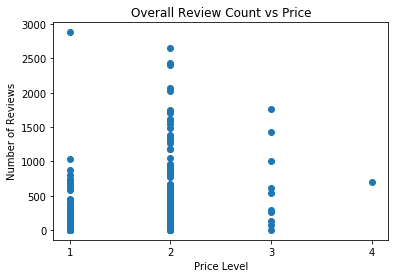

<Figure size 432x288 with 0 Axes>

In [29]:
plt.title("Overall Review Count vs Price")
plt.xlabel("Price Level")
plt.ylabel("Number of Reviews")

plt.scatter(price_clean["Price"],price_clean["Review Count"])

plt.show()
plt.savefig('OverallReviewPrice.png')

In [31]:
price_clean_delivery_yes = price_clean[price_clean["Delivery"]=="True"]
price_clean_delivery_no = price_clean[price_clean["Delivery"]=="False"]

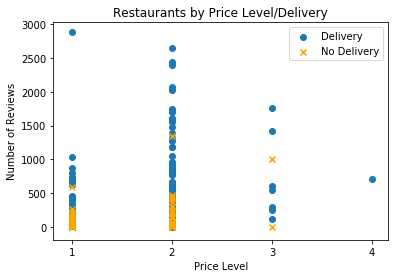

<Figure size 432x288 with 0 Axes>

In [33]:
Labels=["Delivery", "No Delivery"]

plt.title("Restaurants by Price Level/Delivery")
plt.xlabel("Price Level")
plt.ylabel("Number of Reviews")

plt.scatter(price_clean_delivery_yes["Price"],price_clean_delivery_yes["Review Count"])
plt.scatter(price_clean_delivery_no["Price"],price_clean_delivery_no["Review Count"],marker="x", color="orange")
plt.legend(Labels,loc=0)
plt.show()
plt.savefig('OverallReviewPricebyDelivery.png')

In [49]:
four_dollar = price_clean_delivery_yes.loc[price_clean_delivery_yes["Price"] == "4"]

In [50]:
four_dollar

,Restaurant Name,Review Count,Categories,Rating,Coordinates,Delivery,Address,Price
47,Morton's The Steakhouse,705,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",4.0,"{'latitude': 38.5784968, 'longitude': -121.498...",True,"{'address1': '621 Capitol Mall', 'address2': '...",4


In [56]:
price_clean_delivery_yes.sort_values(by=["Review Count"],ascending=False).head()

,Restaurant Name,Review Count,Categories,Rating,Coordinates,Delivery,Address,Price
20,Ramen House Ryujin,2881,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias...",4.5,"{'latitude': 38.5674, 'longitude': -121.4857}",True,"{'address1': '1831 S St', 'address2': '', 'add...",1
15,Oz Korean BBQ,2647,"[{'alias': 'korean', 'title': 'Korean'}, {'ali...",4.0,"{'latitude': 38.56349, 'longitude': -121.33496}",True,"{'address1': '3343 Bradshaw Rd', 'address2': N...",2
48,Iron Horse Tavern,2435,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,"{'latitude': 38.5695762064691, 'longitude': -1...",True,"{'address1': '1800 15th St', 'address2': 'Ste ...",2
40,Tres Hermanas,2397,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,"{'latitude': 38.57369, 'longitude': -121.47456}",True,"{'address1': '2416 K St', 'address2': '', 'add...",2
350,Yard House,2071,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",3.5,"{'latitude': 38.768878772817, 'longitude': -12...",True,"{'address1': '1166 Roseville Pkwy', 'address2'...",2
